<a href="https://colab.research.google.com/github/haiderzm/NeuralNetwithPyTorch/blob/master/Training_and_Validation_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets,transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [24]:
trainset = datasets.FashionMNIST('data',train = True, download = True, transform = transform)
testset = datasets.FashionMNIST('data',train = False, download = True, transform = transform)


0it [00:00, ?it/s]


 94%|█████████▍| 24936448/26421880 [00:01<00:00, 8965938.55it/s]
26427392it [00:01, 13391021.59it/s]                             

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 56%|█████▌    | 16384/29515 [00:00<00:00, 156264.80it/s]
32768it [00:00, 95245.42it/s]                            
0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz



 80%|███████▉  | 3530752/4422102 [00:01<00:00, 1075733.16it/s]
4423680it [00:01, 4026606.99it/s]                             
0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/5148 [00:00<?, ?it/s]
8192it [00:00, 24917.92it/s]            

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64)
testloader = torch.utils.data.DataLoader(testset,batch_size=64)

In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,x):
        
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.softmax(self.fc3(x),dim=1)
        
        return x

In [0]:
device = "cuda:0" if torch.cuda.is_available else "cpu"

In [8]:
model = Net()
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
acc_arr=[]

In [31]:
num_epochs=50
testing_loss=[]
training_loss=[]
def testset_accuracy(epoch):
    correct = 0
    total = 0
    testloss = 0
    
    with torch.no_grad():
        for data in testloader:
            images,labels = data
            images,labels = images.to(device),labels.to(device)
            outputs = model(images)
            testloss+=criterion (outputs,labels)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        acc_arr.append(100*correct/total)
        testing_loss.append(testloss.item())
        print('Epoch :',epoch,'Test Accuracy : %d %%' %(100*correct/total))
        
        
#training

for epoch in range(num_epochs):
    running_loss = 0
    for i,data in enumerate(trainloader,0):
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
    training_loss.append(running_loss)
    testset_accuracy(epoch+1)
    
  


Epoch : 1 Test Accuracy : 78 %
Epoch : 2 Test Accuracy : 78 %
Epoch : 3 Test Accuracy : 78 %
Epoch : 4 Test Accuracy : 78 %
Epoch : 5 Test Accuracy : 78 %
Epoch : 6 Test Accuracy : 86 %
Epoch : 7 Test Accuracy : 86 %
Epoch : 8 Test Accuracy : 87 %
Epoch : 9 Test Accuracy : 87 %
Epoch : 10 Test Accuracy : 87 %
Epoch : 11 Test Accuracy : 87 %
Epoch : 12 Test Accuracy : 87 %
Epoch : 13 Test Accuracy : 87 %
Epoch : 14 Test Accuracy : 87 %
Epoch : 15 Test Accuracy : 87 %
Epoch : 16 Test Accuracy : 87 %
Epoch : 17 Test Accuracy : 87 %
Epoch : 18 Test Accuracy : 87 %
Epoch : 19 Test Accuracy : 87 %
Epoch : 20 Test Accuracy : 87 %
Epoch : 21 Test Accuracy : 87 %
Epoch : 22 Test Accuracy : 87 %
Epoch : 23 Test Accuracy : 87 %
Epoch : 24 Test Accuracy : 87 %
Epoch : 25 Test Accuracy : 87 %
Epoch : 26 Test Accuracy : 87 %
Epoch : 27 Test Accuracy : 87 %
Epoch : 28 Test Accuracy : 87 %
Epoch : 29 Test Accuracy : 87 %
Epoch : 30 Test Accuracy : 87 %
Epoch : 31 Test Accuracy : 87 %
Epoch : 32 Test A

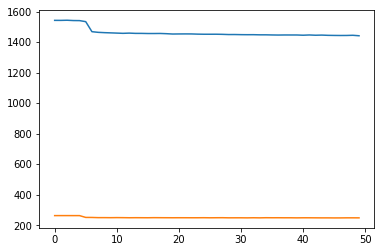

In [32]:
plt.plot(training_loss,label='training')
plt.plot(testing_loss, label='testing')

In [0]:
img,lab = next(iter(testloader))
img,lab= img.to(device),lab.to(device)

tensor([[3.7799e-21, 1.0000e+00, 1.5272e-25, 3.3615e-18, 2.5528e-24, 3.2028e-32,
         9.8926e-38, 2.4341e-18, 5.0806e-31, 3.7914e-23]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)


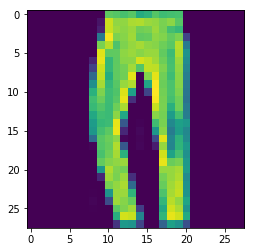

In [34]:
I = 5
print (model(img[I]))
plt.imshow(img[I].cpu().numpy().squeeze())